### Plot the rocky planets in 2d


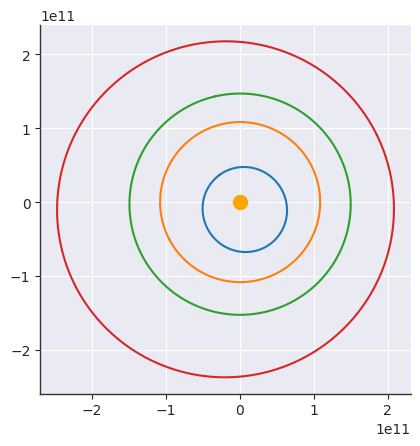

In [1]:
import matplotlib.pyplot as plt
from apygee import MERCURY, VENUS, EARTH, MARS

MERCURY.plot()
VENUS.plot()
EARTH.plot()
MARS.plot()

plt.scatter([0], [0], s=100, color="orange")

### Plot an orbit in 3d


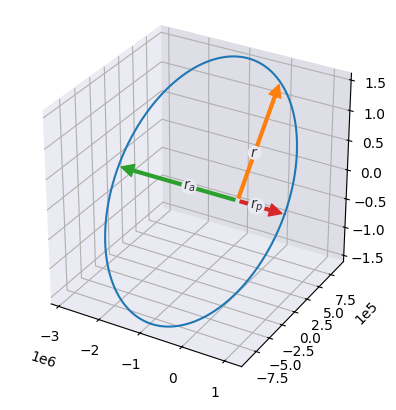

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from apygee import Orbit, MU_EARTH

orbit = Orbit([2e6, 0.45, np.pi / 3, 0, 0, np.pi / 2], mu=MU_EARTH)

# To plot in 3d, create a 3d axis before calling `.plot`
ax = plt.axes(projection="3d")
orbit.plot(show=["r", "r_p", "r_a"])

### Plot orbital elements in 3d


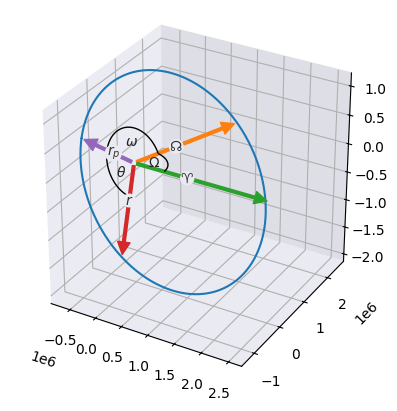

In [3]:
import matplotlib.pyplot as plt
from apygee import Orbit, MU_EARTH

orbit = Orbit([2e6, 0.45, np.pi / 3, np.pi / 2.5, np.pi * 0.8, np.pi / 2], mu=MU_EARTH)

# To plot in 3d, create a 3d axis before calling `.plot`
ax = plt.axes(projection="3d")
orbit.plot(show=["r_p", "r", "theta", "n", "omega", "x", "Omega"])

### Visualize an orbit (requires plotly)


In [4]:
from apygee import Orbit, MU_EARTH

orbit = Orbit([2e6], mu=MU_EARTH)
orbit.visualize()

GridBox(children=(Label(value='a'), FloatSlider(value=2000000.0, layout=Layout(width='100%'), max=4000000.0, m…

FigureWidget({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<br>z=%{z}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#66C2A5', 'dash': 'solid', 'width': 5},
              'marker': {'size': 10, 'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'uid': '83bf1b19-33e2-4d49-a767-40916b67b1b5',
              'x': array([2000000.        , 1999960.44263737, 1999841.77211425, ...,
                          1999841.77211425, 1999960.44263737, 2000000.        ]),
              'y': array([ 0.00000000e+00,  1.25788666e+04,  2.51572357e+04, ..., -2.51572357e+04,
                          -1.25788666e+04, -4.89858720e-10]),
              'z': array([0., 0., 0., ..., 0., 0., 0.])},
             {'hovertemplate': 'x=%{x}<br>y=%{y}<br>z=%{z}<extra></extra>',
              'legendgroup': '',
              'line': {'width'

### Hohmann transfer from Earth to Mars


Δv1 = 2.94 km/s
Δv2 = 2.65 km/s
Total Δv = 5.59 km/s
Δt = 258.86 days


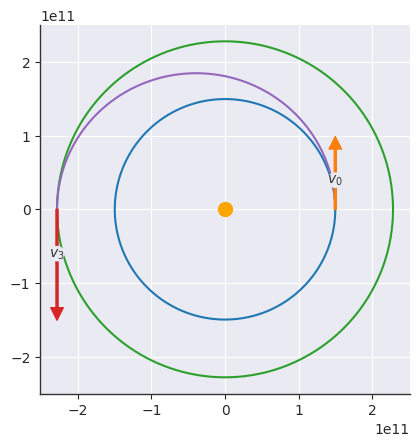

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from apygee import Orbit, EARTH, MARS, MU_SUN

earth = Orbit([EARTH.a], mu=MU_SUN).at_theta(0)
mars = Orbit([MARS.a], mu=MU_SUN).at_theta(np.pi)
transfer = earth.hohmann_transfer(mars)

# Note: the velocities are *not* drawn to scale! Only the direction is "correct"
earth.plot(show=["v"], labels={"v": "$v_0$"})
mars.plot(show=["v"], labels={"v": "$v_3$"})
transfer.plot(thetas=np.linspace(0, np.pi, 100))
plt.scatter([0], [0], s=100, color="orange")

v0 = earth.at_theta(0).v_vec
v1 = transfer.at_theta(0).v_vec
dv1 = np.linalg.norm(v1 - v0)
print(f"Δv1 = {dv1/1e3:.2f} km/s")

v2 = transfer.at_theta(np.pi).v_vec
v3 = mars.at_theta(np.pi).v_vec
dv2 = np.linalg.norm(v3 - v2)
print(f"Δv2 = {dv2/1e3:.2f} km/s")

dv = dv1 + dv2
print(f"Total Δv = {dv/1e3:.2f} km/s")

dt = transfer.at_theta(np.pi).t - transfer.at_theta(0).t
print(f"Δt = {dt/3600/24:.2f} days")

### Bielliptic (or double Hohmann) transfer from Earth to Mars


Δv1 = 6.77 km/s
Δv2 = 1.94 km/s
Δv3 = 3.73 km/s
Total Δv = 12.44 km/s


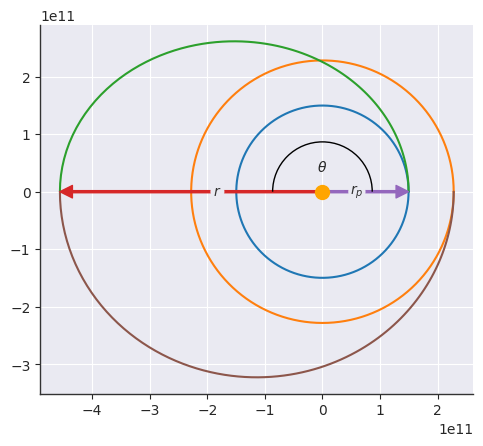

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from apygee import Orbit, EARTH, MARS, MU_SUN

earth = Orbit([EARTH.a], mu=MU_SUN).at_theta(0)
mars = Orbit([MARS.a], mu=MU_SUN).at_theta(np.pi)
[transfer1, transfer2] = earth.bielliptic_transfer(mars, ra=mars.ra * 2)

earth.plot()
mars.plot()
transfer1.plot(thetas=np.linspace(0, np.pi, 100), theta=np.pi, show=["r", "r_p", "theta"])
transfer2.plot(thetas=np.linspace(np.pi, 2 * np.pi, 100))
plt.scatter([0], [0], s=100, color="orange", zorder=3)

v0 = earth.at_theta(0).v_vec
v1 = transfer1.at_theta(0).v_vec
dv1 = np.linalg.norm(v1 - v0)
print(f"Δv1 = {dv1/1e3:.2f} km/s")

v2 = transfer1.at_theta(np.pi).v_vec
v3 = transfer2.at_theta(np.pi).v_vec
dv2 = np.linalg.norm(v3 - v2)
print(f"Δv2 = {dv2/1e3:.2f} km/s")

v4 = transfer2.at_theta(0).v_vec
v5 = mars.at_theta(2 * np.pi).v_vec
dv3 = np.linalg.norm(v5 - v4)
print(f"Δv3 = {dv3/1e3:.2f} km/s")

dv = dv1 + dv2 + dv3
print(f"Total Δv = {dv/1e3:.2f} km/s")

### Computing delta-v gain for Bielliptic over Hohmann transfer


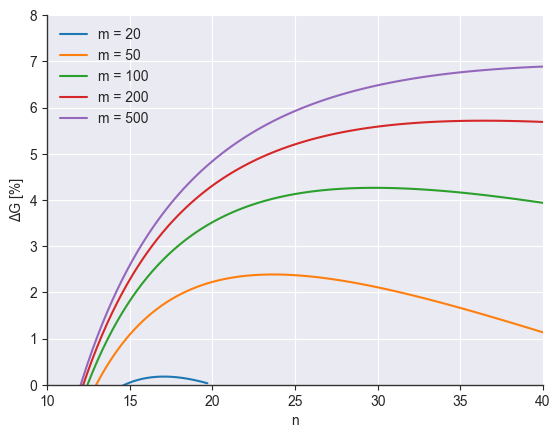

In [7]:
from itertools import product
from apygee import Orbit, EARTH, MU_SUN
import matplotlib.pyplot as plt
import numpy as np

plt.style.use(
    [
        "seaborn-v0_8-darkgrid",
        {
            "axes.spines.top": False,
            "axes.spines.right": False,
            "axes.edgecolor": (0.2, 0.2, 0.2),
            "axes.linewidth": 1,
            "xtick.major.size": 3.5,
            "ytick.major.size": 3.5,
        },
    ]
)


def hohmann(n, m):
    r1 = EARTH.a
    r2 = n * r1

    orbit1 = Orbit([r1], MU_SUN)
    orbit2 = Orbit([r2], MU_SUN)
    transfer = orbit1.hohmann_transfer(orbit2)

    v0 = orbit1.at_theta(0).v_vec
    v1 = transfer.at_theta(0).v_vec
    dv1 = np.linalg.norm(v1 - v0)

    v2 = transfer.at_theta(np.pi).v_vec
    v3 = orbit2.at_theta(np.pi).v_vec
    dv2 = np.linalg.norm(v3 - v2)

    return dv1 + dv2


def bielliptic(n, m):
    r1 = EARTH.a
    r2 = n * r1
    ra = m * r1

    orbit1 = Orbit([r1], MU_SUN)
    orbit2 = Orbit([r2], MU_SUN)
    [transfer1, transfer2] = orbit1.bielliptic_transfer(orbit2, ra=ra)

    v0 = orbit1.at_theta(0).v_vec
    v1 = transfer1.at_theta(0).v_vec
    dv1 = np.linalg.norm(v1 - v0)

    v2 = transfer1.at_theta(np.pi).v_vec
    v3 = transfer2.at_theta(np.pi).v_vec
    dv2 = np.linalg.norm(v3 - v2)

    v4 = transfer2.at_theta(0).v_vec
    v5 = orbit2.at_theta(2 * np.pi).v_vec
    dv3 = np.linalg.norm(v5 - v4)

    return dv1 + dv2 + dv3


ns = np.linspace(10, 40, 100)
ms = np.array([20, 50, 100, 200, 500])


def filter_nm(x):
    [n, m] = x

    if not m > n:
        return False

    if not (n > 1 and m > 1):
        return False

    return True


nns = []
mms = []
GGs = []


for n, m in filter(filter_nm, product(ns, ms)):
    dvh = hohmann(n, m)
    dvb = bielliptic(n, m)
    G = -(dvb - dvh) / dvh * 100

    nns.append(n)
    mms.append(m)
    GGs.append(G)


res = np.vstack([nns, mms, GGs]).T

for m in np.unique(res[:, 1]):
    mask = res[:, 1] == m
    plt.plot(res[mask, 0], res[mask, 2], label=f"m = {m:.0f}")

plt.xlabel("n")
plt.ylabel("ΔG [%]")
plt.xlim([10, 40])
plt.ylim([0, 8])
plt.legend()

### General coplanar transfer


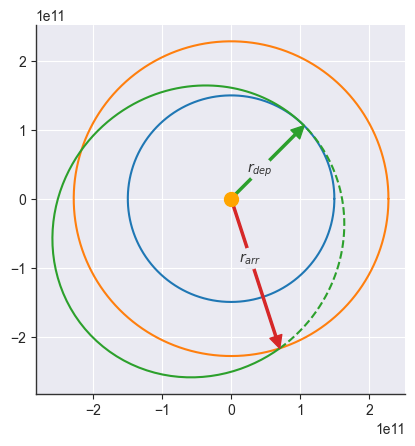

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from apygee import Orbit, EARTH, MARS, MU_SUN

theta_dep = np.pi / 4
theta_arr = 8 * np.pi / 5

earth = Orbit([EARTH.a], mu=MU_SUN)
mars = Orbit([MARS.a], mu=MU_SUN)
transfer = earth.coplanar_transfer(mars, theta_dep, theta_arr)

earth.plot()
mars.plot()
transfer.plot(
    thetas=np.linspace(theta_dep, theta_arr, num=100) - transfer.omega,
    theta=theta_dep - transfer.omega,
    labels={"r": r"$r_{dep}$"},
    show=["r"],
    c="tab:green",
)
transfer.plot(
    thetas=np.linspace(theta_arr, theta_dep + 2 * np.pi) - transfer.omega,
    theta=theta_arr - transfer.omega,
    labels={"r": r"$r_{arr}$"},
    show=["r"],
    c="tab:green",
    ls="--",
)
plt.scatter([0], [0], s=100, color="orange", zorder=3)

### Impulsive shot


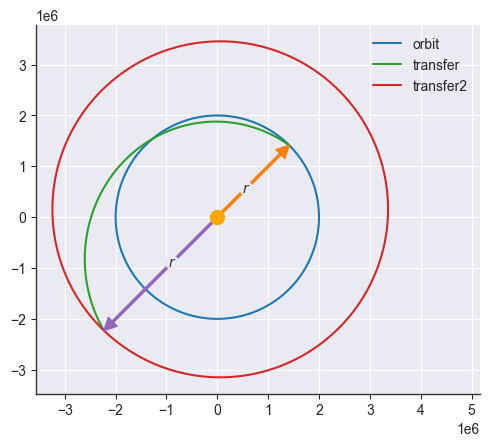

In [9]:
import matplotlib.pyplot as plt
from apygee import Orbit, MU_EARTH

theta = np.pi / 4
dtheta = np.pi

orbit = Orbit([2e6], mu=MU_EARTH)
orbit.plot(theta=theta, show=["r"], label="orbit")

# Providing `dv` as a scalar requires passing the angle `x` (see below for visualization)
transfer = orbit.impulsive_shot(dv=3e3, x=np.pi / 3, theta=theta)
transfer.plot(thetas=np.linspace(transfer.theta, transfer.theta + dtheta, 100), label="transfer")

# Alternatively, provide `dv` as a vector:
theta2 = dtheta + (theta - transfer.omega)
transfer2 = transfer.impulsive_shot(dv=[3e3, 1e3, 2e3], theta=theta2)
transfer2.plot(theta=transfer2.theta, show=["r"], label="transfer2")

plt.scatter([0], [0], s=100, color="orange", zorder=3)
plt.xlim(np.array(plt.xlim()) * [1, 1.4])
plt.legend(loc="upper right")

The angle `x` is measured between the `dv` vector and `v0`, which we can visualize using the utility functions `plot_vector` and `plot_angle`:


0.789 0.789


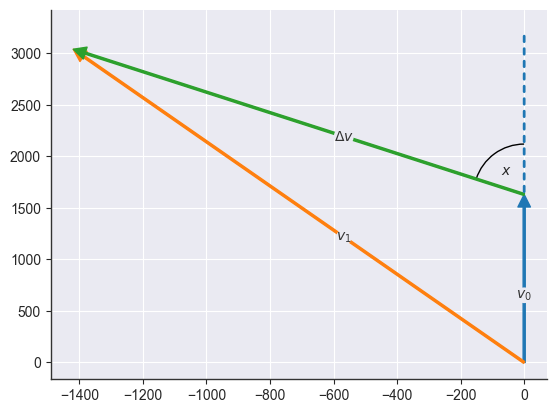

In [135]:
from apygee.plot import plot_vector, plot_angle
from apygee.utils import angle_between, rotate_vector

orbit = Orbit([150e6], MU_EARTH)
theta = 0
x = 0.789
dv = 2e3

v0 = orbit.at_theta(theta).v_vec

uv = v0 / np.linalg.norm(v0)
dv_vec = rotate_vector(uv, orbit.h_vec, x) * dv
v1 = v0 + dv_vec

plot_vector(v0, text="$v_0$")
plot_vector(v1, text="$v_1$")
plot_vector(dv_vec, origin=v0, text=r"$\Delta v$")

plot_angle(v0, dv_vec, origin=v0, text="$x$")
plot_vector(
    v0,
    origin=v0,
    arrow_kwargs=dict(arrowstyle="-", color="#1f77b4", lw=2, ls=(0, (2, 2.5))),
)

print(angle_between(dv_vec, v0), x)